# Size exclusion chromatography
This tutorial shows a first working example with CADET for the simulation of a size exclusion chromatography step (SEC). Size exclusion chromatography is based on the different porosities that molecules of different sizes are capable of accessing. The larger the molecule, the smaller the accessible liquid volume. 

In this tutorial, we will:
- Create a chromatograpy model
- Simulate an SEC separation
- Change the porosity for a separation of two molecules

## 1. Setting up the model

Before we start with specifying the system, we define a wide variety of settings. Note that all units need to be SI units.


- **Exercise:** Take a look at the file `aekta_generator.py` to see all the lifting which is done in the background to define the model.

----

Below, the initialization of three objects takes place:
- `component_system`: Defines what molecules are relevant for your experiment (e.g. salt, mAb, aggregates)
- `column`: Defines the chromatography column (e.g. a SEC column)
- `flowsheet`: Defines the flowpath in your system (e.g. pump to column to outlet)

In [18]:
from CADETProcess.processModel import ComponentSystem
from aekta_generator import generate_sec_column, generate_akta


component_system = ComponentSystem(['Salt', 'Protein A', 'Protein B'])
column = generate_sec_column(component_system)
flowsheet = generate_akta(component_system, column=column)

Once we defined the components, the column and the flowsheet, we still need to define what process we would like to execute:
- `process`: Defines the process events (e.g. load, wash, elution)

Again, this has already been implemented for you in the file `aekta_generator.py`.

In [19]:
from aekta_generator import generate_isocratic_process

process = generate_isocratic_process(flowsheet)

All events can are stored in the events attribute. To visualize the trajectory of the parameter state over the entire cycle, the Process provides a `plot_events()` method.

Text(0.15, 4, 'Elution')

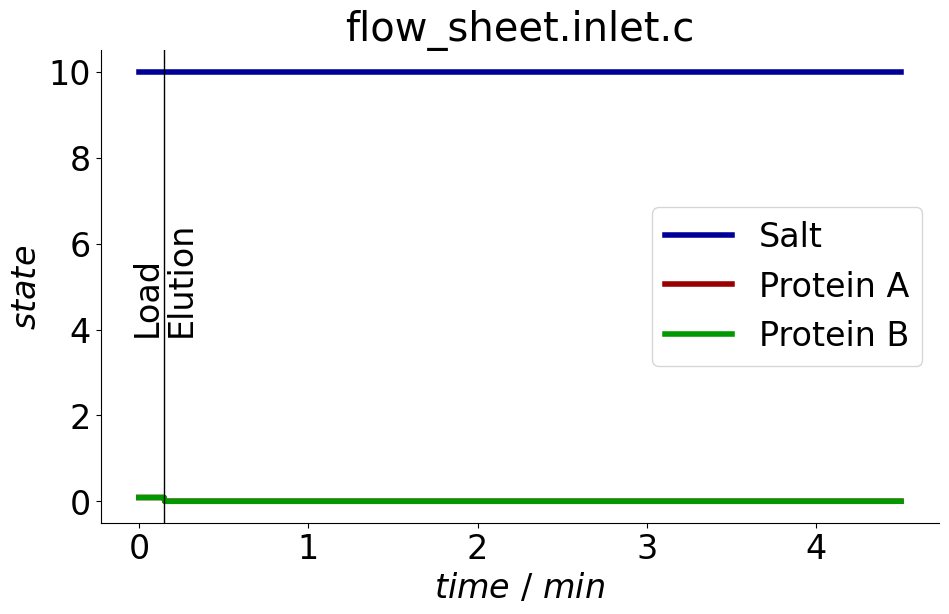

In [31]:
_ = process.plot_events()
plt.legend(['Salt', 'Protein A', 'Protein B'])
plt.axvline(0.15, color='k', linewidth=1)
plt.text(-0.05, 4, 'Load', rotation=90)
plt.text(0.15, 4, 'Elution', rotation=90)

## 2. Setting up the simulator and running the simulation

To simulate the process, a process simulator needs to be configured.
If no path is specified, CADET-Process will try to autodetect CADET.

In [4]:
from CADETProcess.simulator import Cadet
process_simulator = Cadet()

If a specific version of CADET is to be used, add the install path to the constructor:

```
process_simulator = Cadet(install_path='/path/to/cadet/executable')
```

To check that everything works correctly, you can call the check_cadet method:

In [5]:
process_simulator.check_cadet()

Test simulation completed successfully


True

Now, run the simulation:

In [6]:
simulation_results = process_simulator.simulate(process)

All results of the simulation are stored in `simulation_results`. We can visualize the results as shown below:

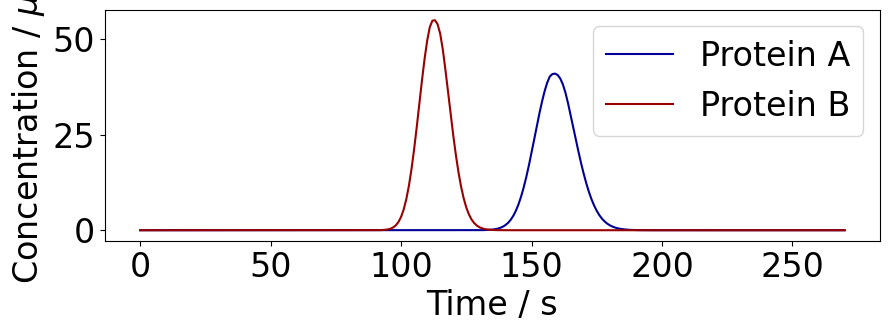

In [32]:
import matplotlib.pyplot as plt

def plot_results(simulation_results):
    c_out = simulation_results.solution.outlet.outlet.total_concentration_components
    t_out = simulation_results.solution.outlet.outlet.time

    plt.figure(figsize=(10,3))
    plt.plot(t_out, c_out[:, 1:]*1e3, lw=1.5)
    plt.legend(['Protein A', 'Protein B'])
    plt.xlabel('Time / s')
    plt.ylabel(r'Concentration / $\mu$M')
    
plot_results(simulation_results)

As you can see, we have achieved a baseline separation in the above example. Protein A elutes later, will Protein B elutes earlier.

## 3. Exercises

1. If Protein A and B are monomer and aggregate, which one is the monomer and which one the aggregate?
2. The accesible porosity in the beads for different proteins is given by `column.pore_accessibility=[1, x, y]`. Find this line in the file `aekta_generator.py` and note in the cell below, what percentage of the porosity is accessible for protein A and B.
3. What is the apparent total porosity for the two molecules?
4. In this Jupyter Notebook, change the accessible pore volume to 80% and 50% and rerun the simulation. Do not change the file `aekta_generator.py`. (note: you can adjust the varible here by just resetting it with the right list, i.e. `column.pore_accessibility=[1, v, w]`). You will have to rerun the simulation thereafter. Use the function `plot_results` for visualizing the simulation.
5. Try to add a third protein (fragment) to the simulation. You will have to change the file `aekta_generator.py` for that. Consider making a new version of the file and importing it.